# Bank Note Authentication Prediction Project

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.


## Importing Data

**Using pandas to read in the bank_note_data.csv file.**

In [8]:
import pandas as pd

In [9]:
data = pd.read_csv('bank_note_data.csv')

**Checking the head of the Data.**

In [10]:
data.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Exploratory Data Analysis (EDA)

We'll just do a few quick plots of the data.

**Importting seaborn and set matplolib inline for viewing **

In [11]:
import seaborn as sns
%matplotlib inline

**Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

<AxesSubplot: xlabel='Class', ylabel='count'>

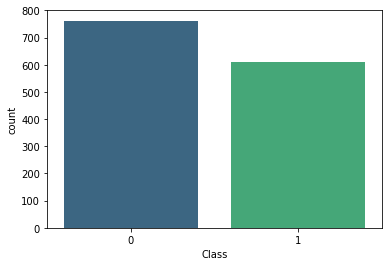

In [12]:
sns.countplot(x='Class',data=data, palette='viridis')

**Creating a PairPlot of the Data with Seaborn, setting Hue to Class (Authentic 1 vs Fake 0) **

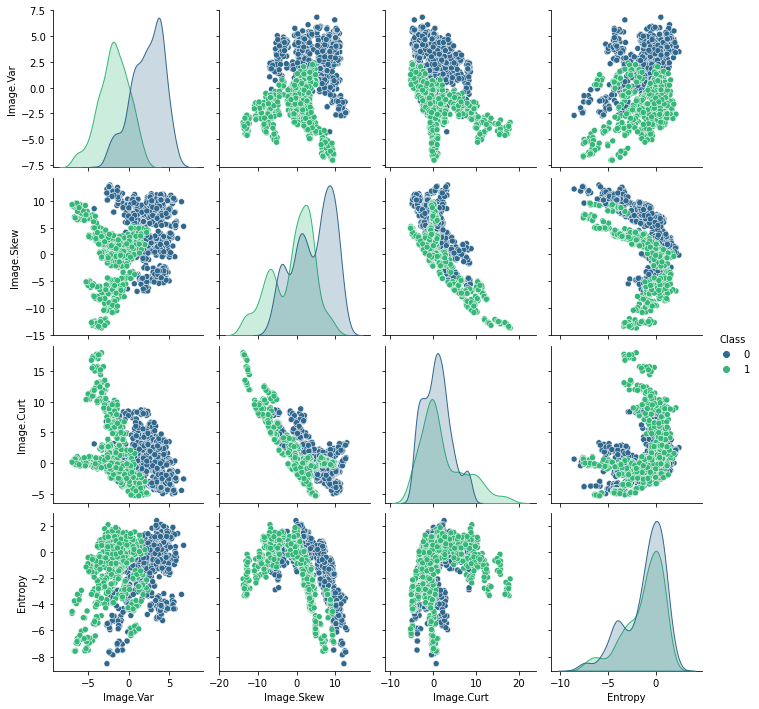

In [13]:
sns.pairplot(data,hue='Class', palette='viridis')

## Data Preparation 

### Standard Scaling



In [14]:
from sklearn.preprocessing import StandardScaler

**Creating a StandardScaler() object called scaler.**

In [15]:
scaler = StandardScaler()

**Fitting scaler to the features.**

In [16]:
scaler.fit(data.drop('Class',axis=1))

StandardScaler()

**Using the .transform() method to transform the features to a scaled version.**

In [17]:
scaled_features = scaler.fit_transform(data.drop('Class',axis=1))

**Converting the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

**Creating two objects X and y which are the scaled feature values and labels, respectively.**

In [19]:
X = df_feat

In [20]:
y = data['Class']

**Using SciKit Learn to create training and testing sets of the data**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Modelling

**Using SciKit Learn to Create a Random Forest Classifier and then evaluating the model with the confusion matrix and classification report.**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
rfc = RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
rfc_preds = rfc.predict(X_test)

In [32]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       303
           1       1.00      0.98      0.99       246

    accuracy                           0.99       549
   macro avg       0.99      0.99      0.99       549
weighted avg       0.99      0.99      0.99       549



In [33]:
print(confusion_matrix(y_test,rfc_preds))

[[302   1]
 [  5 241]]
